In [123]:
import torch
from torch import nn
from torchvision import datasets,transforms
import matplotlib.pyplot as plt

In [4]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [23]:
torch.__version__

'2.10.0'

**Dataset**

In [6]:
train_dataset=datasets.MNIST(root='../data',train=True,download=True,transform=transforms.ToTensor())
test_dataset=datasets.MNIST(root='../data',train=False,download=True,transform=transforms.ToTensor())

In [7]:
train_dataloader=torch.utils.data.DataLoader(dataset=train_dataset,shuffle=True,batch_size=64)
test_dataloader=torch.utils.data.DataLoader(dataset=test_dataset,shuffle=False,batch_size=64)

In [120]:
train_dataset.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

**Parameters**

In [8]:
image,label=train_dataset.__getitem__(0)
c,h,w=image.shape
input_shape=(h,w)
num_classes=len(train_dataset.classes)
in_channels=c
print(f"input_shape:{input_shape}")
print(f"in_channels:{in_channels}")
print(f"num_classes:{num_classes}")

input_shape:(28, 28)
in_channels:1
num_classes:10


**Hyperparameters**

In [16]:
num_epochs=5
learning_rate=1e-3
batch_size=64

**CNN Arch**

In [10]:
m = nn.Conv2d(16, 33, 3, stride=2)
input=torch.randn(20,16,50,100)
p=m(input)
p.shape

torch.Size([20, 33, 24, 49])

In [11]:
class CNN(nn.Module):
    #入参，和数据集相关
    def __init__(self,input_shape,in_channels,num_classes):
        # 继承自父类
        super(CNN,self).__init__()
        # conv2d:(b,1,28,28) -> (b,16,28,28)
        # maxpool2d:(b,16,28,28) -> (b,16,14,14)
        self.cnn1=nn.Sequential(nn.Conv2d(in_channels=in_channels,out_channels=16,kernel_size=5,padding=2,stride=1),
                                nn.BatchNorm2d(16),
                                nn.ReLU(),
                                nn.MaxPool2d(kernel_size=2,stride=2))
        # conv2d:(b,16,14,14) -> (b,32,14,14)
        # maxpool2d:(b,32,14,14) -> (b,32,7,7)
        self.cnn2=nn.Sequential(nn.Conv2d(in_channels=16,out_channels=32,kernel_size=5,padding=2,stride=1),
                                nn.BatchNorm2d(32),
                                nn.ReLU(),
                                nn.MaxPool2d(kernel_size=2,stride=2))
        # fc:(b,32,7,7) -> (b,32*7*7) -> (b,num_classes)
        self.fc=nn.Linear(32*(input_shape[0]//4)*(input_shape[1]//4),num_classes)
    def forward(self,x):
        # x:(b,1,28,28)
        out1=self.cnn1(x)
        # out1:(b,16,14,14)
        out2=self.cnn2(out1)
        # out2: (b,32,7,7)
        out2=out2.reshape(out2.shape[0],-1)
        # out2: (b,32*7*7)
        out3=self.fc(out2)
        # out3: (b,num_classes)
        return out3
        
        
        

**Summary**

In [12]:
!pip install torchsummary

In [12]:
from torchsummary import summary
model=CNN(input_shape=input_shape,in_channels=in_channels,num_classes=num_classes)
summary(model,input_size=(1,28,28),batch_size=64)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [64, 16, 28, 28]             416
       BatchNorm2d-2           [64, 16, 28, 28]              32
              ReLU-3           [64, 16, 28, 28]               0
         MaxPool2d-4           [64, 16, 14, 14]               0
            Conv2d-5           [64, 32, 14, 14]          12,832
       BatchNorm2d-6           [64, 32, 14, 14]              64
              ReLU-7           [64, 32, 14, 14]               0
         MaxPool2d-8             [64, 32, 7, 7]               0
            Linear-9                   [64, 10]          15,690
Total params: 29,034
Trainable params: 29,034
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.19
Forward/backward pass size (MB): 29.86
Params size (MB): 0.11
Estimated Total Size (MB): 30.17
-------------------------------------------

In [85]:
model.parameters()

<generator object Module.parameters at 0x1506a7060>

**Train**

In [14]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

In [17]:
total_batch=len(train_dataloader)
for epoch in range(num_epochs):
    for batch_idx,(images,labels) in enumerate(train_dataloader):
        images=images.to(device)
        labels=labels.to(device)
        out=model(images)
        loss=criterion(out,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if((batch_idx+1)%100==0):
            print(f'epoch:{epoch+1}/{num_epochs},batch:{batch_idx+1}/{total_batch},loss:{loss.item():.4f}')
        
        

epoch:1/5,batch:100/938,loss:0.0041
epoch:1/5,batch:200/938,loss:0.0048
epoch:1/5,batch:300/938,loss:0.0178
epoch:1/5,batch:400/938,loss:0.0393
epoch:1/5,batch:500/938,loss:0.0448
epoch:1/5,batch:600/938,loss:0.0008
epoch:1/5,batch:700/938,loss:0.1988
epoch:1/5,batch:800/938,loss:0.0292
epoch:1/5,batch:900/938,loss:0.0032
epoch:2/5,batch:100/938,loss:0.0071
epoch:2/5,batch:200/938,loss:0.0016
epoch:2/5,batch:300/938,loss:0.0025
epoch:2/5,batch:400/938,loss:0.0499
epoch:2/5,batch:500/938,loss:0.0009
epoch:2/5,batch:600/938,loss:0.0304
epoch:2/5,batch:700/938,loss:0.0005
epoch:2/5,batch:800/938,loss:0.0010
epoch:2/5,batch:900/938,loss:0.0201
epoch:3/5,batch:100/938,loss:0.0042
epoch:3/5,batch:200/938,loss:0.0082
epoch:3/5,batch:300/938,loss:0.0089
epoch:3/5,batch:400/938,loss:0.0010
epoch:3/5,batch:500/938,loss:0.0006
epoch:3/5,batch:600/938,loss:0.0022
epoch:3/5,batch:700/938,loss:0.1371
epoch:3/5,batch:800/938,loss:0.0189
epoch:3/5,batch:900/938,loss:0.0004
epoch:4/5,batch:100/938,loss

**Evaluate**

In [22]:
total=0
correct=0
for images,labels in test_dataloader:
    images=images.to(device)
    labels=labels.to(device)
    out=model(images)
    preds=torch.argmax(out,dim=1)
    total+=images.shape[0]
    correct+=(preds==labels).sum().item()
print(f'{correct}/{total}={correct/total}')
    
    

9931/10000=0.9931


**Save**

In [23]:
torch.save(model.state_dict(),'cnn_mnist.ckpt')

**Inference**

In [149]:
model.load_state_dict(torch.load('cnn_mnist.ckpt'))
model.eval()  # 必须执行：关闭 BatchNorm 的动态更新
    

CNN(
  (cnn1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (cnn2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)

In [159]:
iterator=iter(test_dataloader)

In [185]:
images,labels=next(iterator)

torch.Size([64, 1, 28, 28])
torch.Size([1])
预测结果是: 1


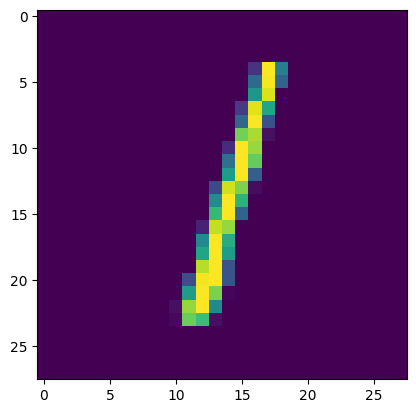

In [186]:
print(image.shape)
plt.imshow(image[2][0])
img_tensor = image[2].unsqueeze(0) 
img_tensor = img_tensor.to(device)


# 4. 推断
with torch.no_grad(): # 禁用梯度计算，节省内存
    output = model(img_tensor)
    
    # 5. 获取结果
    # output 是概率分布（或者说 logits），取最大值的索引
    predicted = torch.argmax(output, dim=1)
    print(predicted.shape)
    
print(f'预测结果是: {predicted.item()}')